In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import *
from backtest import preprocess

In [2]:
orderdf, acc = SingleDayHDAll('acc_sub.txt', '/Data/database/logs_thunder/20220321', 20220321) 

In [10]:
dfs = []
ticks = []
for dat in [20220117]:
    path = os.path.join('/Data/database/logs_thunder', str(dat))
    orderdf, acc = SingleDayHDAll('acc_sub.txt', path, dat) 
    path = '/Data/database/data_zltick/m'
    tick_data, contract = preprocess(path, str(dat)+'.csv')
    orderdf = orderdf[orderdf.ticker=='m']
    dfs.append(orderdf)
    ticks.append(tick_data)
    break
dfs = pd.concat(dfs)
ticks = pd.concat(ticks)
dfs['ticktime'] = dfs.ticktime.apply(lambda x:x+'00' if x.split('.')[1]=='0' else x)
ticks = ticks.reset_index()
ticks['ticktime'] = ticks.datetime.astype('str').apply(lambda x:x.split(' ')[1])

# a = orderdf[orderdf.ticker=='rb']
# a
# a = orderdf[orderdf.fx > 0]
# a = a[a.odprice == a.bidprice]
# a[(a.ticker=='rb') & (a.pss_cost>0)].iloc[0]
# a[a.filled_price > a.odprice]
# orderdf.iloc[100]



In [11]:
dfs

,acc_requestid,acc,reqid,ticktime,symbol,ticker,odtype,odprice,midprice,askprice,...,fx,filled_value,filled_lots,filled_time,filled_seconds,filled_date,pv,filled_price,agg_cost,pss_cost
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-16 21:00:03,71590066-22100026,71590066,22100026,21:00:02.667,m2205,m,SellOpen,3190.0,3199.5,3200.0,...,-1,3200.0,1,21:00:02\n,0.000,20220117,10.0,3200.0,10.0,0.0
2022-01-16 21:00:03,2120115-42100026,2120115,42100026,21:00:02.667,m2205,m,SellOpen,3190.0,3199.5,3200.0,...,-1,6400.0,2,21:00:02\n,0.000,20220117,10.0,3200.0,10.0,0.0
2022-01-16 21:00:03,11801606-52100026,11801606,52100026,21:00:02.667,m2205,m,SellOpen,3190.0,3199.5,3200.0,...,-1,3199.0,1,21:00:03\n,0.333,20220117,10.0,3199.0,10.0,10.0
2022-01-16 21:00:03,16606569-92100026,16606569,92100026,21:00:02.667,m2205,m,SellOpen,3190.0,3199.5,3200.0,...,-1,3200.0,1,21:00:02\n,0.000,20220117,10.0,3200.0,10.0,0.0
2022-01-16 21:00:03,2120155-42100026,2120155,42100026,21:00:02.667,m2205,m,SellCloseY,3190.0,3199.5,3200.0,...,-1,3199.0,1,21:00:03\n,0.333,20220117,10.0,3199.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-17 14:28:15,16606569-551428139,16606569,551428139,14:28:13.959,m2205,m,SellOpen,3160.0,3159.5,3160.0,...,-1,3160.0,1,14:28:16\n,2.041,20220117,10.0,3160.0,10.0,0.0
2022-01-17 14:32:44,YLAN158-171432430,YLAN158,171432430,14:32:43.7,m2205,m,SellOpen,3159.0,3158.5,3159.0,...,-1,3159.0,1,14:32:44\n,0.300,20220117,10.0,3159.0,10.0,0.0
2022-01-17 14:33:44,wkzq191021-171433430,wkzq191021,171433430,14:33:43.50,m2205,m,SellOpen,3159.0,3158.5,3159.0,...,-1,3159.0,1,14:33:45\n,1.500,20220117,10.0,3159.0,10.0,0.0


In [149]:
# dfs.reset_index().datetime.astype('str').apply(lambda x:x.split()[0]).unique()
# dfs.apply(lambda x:(ticks[ticks.ticktime==x['ticktime']].ticktime), axis=1)
# dfs.iloc[80]
for _, data in dfs.iterrows():
    tim = data['ticktime']
    ind = ticks[ticks.ticktime==tim].index[0]
    print(ticks.iloc[ind-2:ind+2])
    break

dfs.iloc[3]

                 datetime  bid  ask      bidv      askv     volume  \
3 2022-03-18 21:00:01.500  5.0  7.0 -0.604016 -0.717893  10.035536   
4 2022-03-18 21:00:02.000  1.0  5.0  6.960156  0.322361   6.201803   
5 2022-03-18 21:00:02.500  2.0  5.0 -0.723451  1.145249   7.074715   
6 2022-03-18 21:00:03.000  2.0  4.0 -0.691601 -0.593683   4.503165   

       ticktime  
3  21:00:01.500  
4  21:00:02.000  
5  21:00:02.500  
6  21:00:03.000  


acc_requestid     71590066-62100025
acc                        71590066
reqid                      62100025
ticktime               21:00:02.500
symbol                       rb2205
ticker                           rb
odtype                    BuyCloseY
odprice                      4935.0
midprice                     4926.5
askprice                     4928.0
bidprice                     4925.0
askvol                        242.0
bidvol                          1.0
lastprice                    4928.0
fx                                1
filled_value                 4925.0
filled_lots                       1
filled_time              21:00:02\n
filled_seconds                  0.0
filled_date                20220318
pv                             10.0
filled_price                 4925.0
agg_cost                       30.0
pss_cost                        0.0
Name: 2022-03-20 21:00:03, dtype: object

In [82]:
ticks.ticktime.notnull().sum()

0

In [54]:
pd.read_parquet()

TypeError: read_parquet() missing 1 required positional argument: 'path'

In [26]:
agent = pd.read_csv('res/rb.csv')
oa = pd.read_csv('res/rb/DRLBuy.csv')
hd = {}
lv = {}
for i in [30, 50, 100, 200, 500, 600]:
    hd[i] = pd.read_csv(f'res/rb{i}hd.csv')
for i in [1, 2, 3, 5, 7, 10, 20]:
    lv[i] = pd.read_csv(f'res/rb{i}lv.csv')

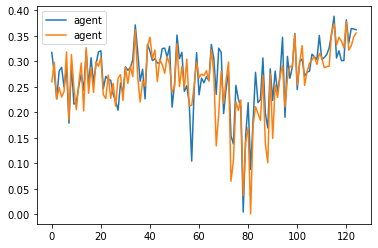

1.2916703802347655

In [31]:
fig, ax = plt.subplots()
ax.plot(agent.avgR, label='agent')
ax.plot(oa.avgR, label='agent')

# ax.plot(hd[30].avgR, label='hd 30')
# ax.plot(hd[200].avgR, label='hd 200')
# ax.plot(hd[600].avgR, label='hd 600')
# ax.plot(lv[2].avgR, label='lv 2')
# ax.plot(lv[10].avgR, label='lv 10')
# ax.plot(lv[20].avgR, label='lv 20')
# ax.plot(data4.avgR, label='lv 10')
# ax.fill_between(data.avgR, data.avgR-data.stdR, data.avgR+data.stdR, alpha=0.1)
plt.legend()
plt.show()

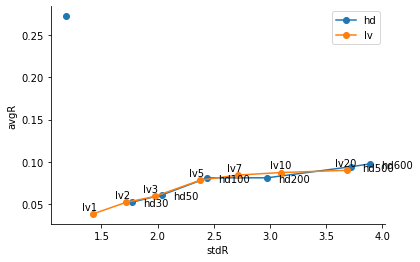

In [96]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
avgr = [i.avgR.mean() for i in hd.values()]
stdr = [i.stdR.mean() for i in hd.values()]
ax.plot(stdr, avgr, 'o-', label='hd')
for text, x, y in zip([30, 50, 100, 200, 500, 600], stdr, avgr):
    ax.annotate(f'hd{text}', xy=(x,y), xytext=(x+0.1,y-0.005))
    # ax.annotate(f'({round(x,2)} {round(y,2)})', xy=(x,y), xytext=(x+0.001,y-0.05))
avgr = [i.avgR.mean() for i in lv.values()]
stdr = [i.stdR.mean() for i in lv.values()]
ax.plot(stdr, avgr, 'o-', label='lv')
for text, x, y in zip([1, 2, 3, 5, 7, 10, 20], stdr, avgr):
    ax.annotate(f'lv{text}', xy=(x,y), xytext=(x-0.1,y+0.005))
    # ax.annotate(f'({round(x,2)} {round(y,2)})', xy=(x,y), xytext=(x+0.001,y-0.05))
ax.scatter(agent.stdR.mean(), agent.avgR.mean())
plt.xlabel('stdR')
plt.ylabel('avgR')
plt.legend()
# ax.plot(hd30.avgR)
# ax.plot(hd30.stdR)

In [97]:
agent.stdS.mean()v

16.084232957987275

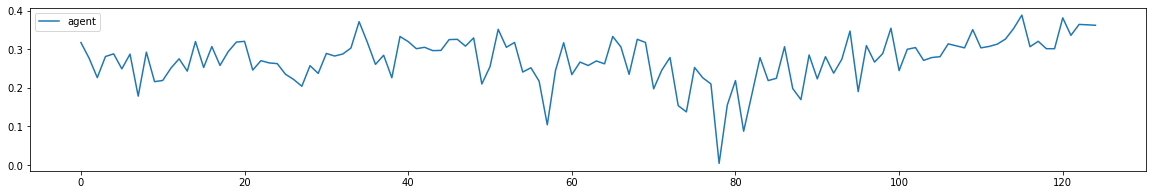

In [9]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(agent.avgR, label='agent')

plt.legend()
plt.show()

In [13]:
# np.corrcoef(agent.avgR, agent.stdR)
ag = pd.read_csv('ag.csv')
pp = pd.read_csv('pp.csv')
SA = pd.read_csv('SA.csv')
m = pd.read_csv('m.csv')


In [29]:
aghd = pd.read_csv('ag600hd.csv')
SAhd = pd.read_csv('SA600hd.csv')
pphd = pd.read_csv('pp600hd.csv')

<AxesSubplot:>

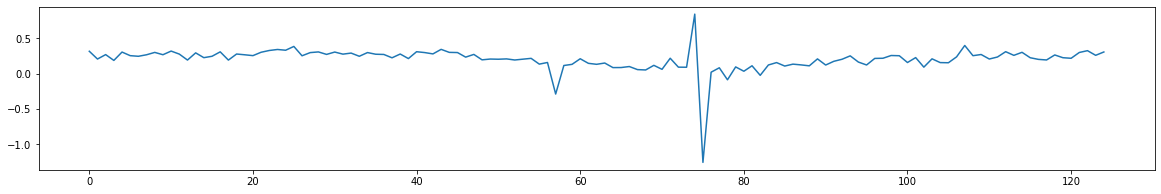

In [39]:
data = SA
# print(data.avgR.mean(), data.stdR.mean(), data.avgS.mean())
plt.figure(figsize=(20,3))
data.avgR.plot()
# aghd.avgR.plot()
# m.avgR.plot()
# pp.avgR.plot()
# SA.avgR.plot()


In [5]:
# data = pd.read_csv('symbol_instrumentid2.csv')
# objs = data.pz.unique()
objs = ['rb', 'bu', 'OI', 'i']
a, b, c = 0, 0, 0
fin = []
cha = []
for obj in objs:
    if os.path.exists(f'res/{obj}/trade/sum.csv'):
        fin.append(obj)
        data = pd.read_csv(f'res/{obj}/trade/sum.csv')
        a+=data.drl.sum()
        b+=data.pss.sum()
        c+=data['agg'].sum()
        cha.append((obj, data.pss.sum()-data.drl.sum()))
cha = sorted(cha, key=lambda x:x[1])
# data = data[data.date!=20220119]

In [6]:
a, b, c

(216025.0, 208890.0, 324700.0)

<BarContainer object of 4 artists>

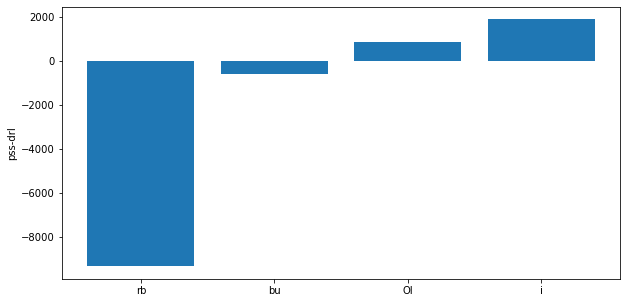

In [8]:
a, b = [x[0] for x in cha], [x[1] for x in cha]
plt.subplots(figsize=(10,5))
plt.ylabel('pss-drl')
plt.bar(a, b)

0 0 0


<BarContainer object of 0 artists>

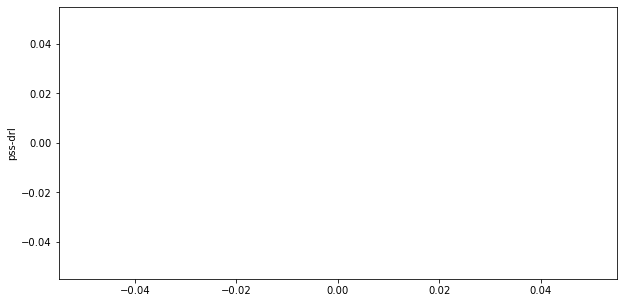

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import *
objs = ['rb', 'bu', 'OI', 'i']
comment = 'test'
cwd = os.path.join('res', comment)
a, b, c = 0, 0, 0
fin = []
cha = []
for obj in objs:
    # file_path = os.path.join(cwd, obj, 'sum.csv')
    file_path = os.path.join(f'./res/{obj}/trade', 'sum.csv')
    if os.path.exists(file_path):
        fin.append(obj)
        data = pd.read_csv(file_path)
        a+=data.drl.sum()
        b+=data.pss.sum()
        c+=data['agg'].sum()
        cha.append((obj, data.pss.sum()-data.drl.sum()))
cha = sorted(cha, key=lambda x:x[1])
# data = data[data.date!=20220119]
print(a,b,c)
a, b = [x[0] for x in cha], [x[1] for x in cha]
plt.subplots(figsize=(10,5))
plt.ylabel('pss-drl')
plt.bar(a, b)

In [4]:
# data = data.set_index(data.date.astype('str'))
data = pd.read_csv(f'res/test/{obj}/sum.csv')
print(data.drl.sum(), data.pss.sum(), data['agg'].sum())
data = pd.read_csv(f'res/{obj}/trade/sum.csv')
print(data.drl.sum(), data.pss.sum(), data['agg'].sum())

57745.0 50810.0 105350.0
60165.0 50810.0 105350.0


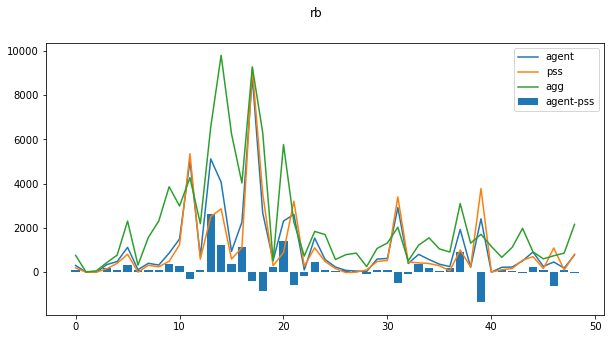

In [3]:
obj = 'rb'
# data = pd.read_csv(f'res/{obj}/trade/sum.csv')
data = pd.read_csv(f'res/test/{obj}/sum.csv')
fig, ax,= plt.subplots(figsize=(10,5))
ax.plot(data.index, data.drl, label='agent')
ax.plot(data.index,data.pss, label='pss')
ax.plot(data.index,data['agg'], label='agg')
ax.bar(data.index, data.drl-data.pss, label='agent-pss')
# ax2 = ax.twinx()
# ax2.plot(data.index,data.avg_drl_sec, label='avg_drl_sec')
# ax2.plot(data.index,data.avg_pss_sec, label='avg_drl_sec')
plt.suptitle(obj)
# ax2 = fig.add_subplot(2,1,2)
plt.legend()